<a href="https://colab.research.google.com/github/JanneVa/Survey-on-AI-Safety-in-M-rida-Yucat-n/blob/main/Sondeo_AI_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extraction, preprocessing, and transformation of data from the survey on AI progress.**

In [83]:
#importing libraries and loading the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sondeo_AI = pd.read_csv('/content/Sondeo sobre el progreso de la IA.csv')


Data exploration

In [86]:
df_columnas = pd.DataFrame(sondeo_AI.columns, columns=['Nombres de Columnas'])

# Show the DataFrame
df_columnas

,Nombres de Columnas
0,Marca temporal
1,Nombre
2,Correo electrónico
3,Institución
4,¿A qué te dedicas?
...,...
59,Marque la casilla que mejor refleje su opinión...
60,Marque la casilla que mejor refleje su opinión...
61,¿Cómo le pareció esta encuesta en relación al ...
62,Aparte de las cuestiones que se han abordado a...


In [87]:
# Showing the first rows of the data
sondeo_AI.head()



,Marca temporal,Nombre,Correo electrónico,Institución,¿A qué te dedicas?,¿Qué carrera estudia?,¿Qué grado está cursando?,¿Trabaja temas relacionados con Inteligencia Artificial?,¿Cuáles son sus principales temas de investigación/enseñanza?,¿En qué país completó sus estudios de posgrado?,...,Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [Los sesgos en los algoritmos de IA representan un riesgo para la equidad y justicia en México.],Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [Las regulaciones actuales en México son adecuadas para los desafíos de seguridad de la IA.],Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [Es importante que el gobierno invierta en mitigar los riesgos de la seguridad de la IA.],Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [Estaría de acuerdo con la creación de un organismo especial para la seguridad de la IA en México.],Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [El gobierno debería regular y supervisar más el uso y desarrollo de la IA en México.],Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [Los expertos de IA deberían tomar en cuenta las necesidades y preocupaciones de la sociedad.],Marque la casilla que mejor refleje su opinión sobre cada una de las siguientes cuestiones [Se podría incrementar la desigualdad socioeconómica en México por la forma en que se desarrolla y utiliza actualmente la IA en el país.],¿Cómo le pareció esta encuesta en relación al tiempo de llenado?,"Aparte de las cuestiones que se han abordado aquí, ¿Qué otras preguntas o tópicos considera importantes para México o Latinoamérica y que deberíamos incluir en la encuesta?",¿Tiene alguna observación adicional?
0,2024/04/01 2:22:39 p.m. GMT-6,Angel Ramón Aranda Campos,arac@cimat.mx,Centro de Investigación en Matemáticas,Investigador/Profesor,NaN,NaN,Si,Ciencia de Datos,México,...,Neutral,En desacuerdo,Neutral,Neutral,Neutral,De acuerdo,Neutral,Adecuado,"No puedo recomendar algo, ya que no se cuales ...",Creo que estas dos últimas preguntas debe ser ...
1,2024/04/01 3:39:19 p.m. GMT-6,Gandhi Samuel Hernández Chan,ghernandez@gmail.com,Centro de Investigación en Ciencias de Informa...,Investigador/Profesor,NaN,NaN,Si,Aplicación de algoritmos de ML a texto y datos...,España,...,Neutral,Neutral,En desacuerdo,En desacuerdo,En desacuerdo,Neutral,Neutral,Largo,¿Qué se está haciendo en cuestiones de educaci...,Ninguna
2,2024/04/01 4:52:44 p.m. GMT-6,Adolfo Sánchez Valenzuela,adolfo@cimat.mx,Centro de Investigación en Matemáticas,Investigador/Profesor,NaN,NaN,No,Geometría diferencial; análisis geométrico; ál...,Estados Unidos de Norteamérica,...,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,Adecuado,Riesgos a los que pueden verse expuestas las i...,Ninguna
3,2024/04/02 9:33:27 a.m. GMT-6,Pedro Javier Escobar Turriza,pjeturriza@gmail.com,El Centro de Investigación y Asistencia en Tec...,Investigador/Profesor,NaN,NaN,Si,Bioinformática y Biología Computacional,México,...,Neutral,Neutral,Neutral,De acuerdo,Neutral,De acuerdo,En desacuerdo,Adecuado,En que campo laboral crees que se aplica mas e...,Preguntar si aplican IA para sus trabajos o so...
4,2024/04/02 9:35:17 a.m. GMT-6,Francisco Javier Hernández López,fcoj23@cimat.mx,CIMAT,Investigador/Profesor,NaN,NaN,Si,Conteo de vehículos y peatones a partir de vid...,México,...,Totalmente de acuerdo,Neutral,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Adecuado,Sin comentarios.,Sin comentarios.


In [88]:
# Data summary
sondeo_AI.info()

# amount of missing data per column
sondeo_AI.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 64 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                                  

Marca temporal                                                                                                                                                                                                                           0
Nombre                                                                                                                                                                                                                                   0
Correo electrónico                                                                                                                                                                                                                       0
Institución                                                                                                                                                                                                                              0
¿A qué te dedicas?                                          

In [89]:
new_column_names = [f'Q{i+1}' for i in range(sondeo_AI.shape[1])]

# Rename the DataFrame columns
sondeo_AI.columns = new_column_names

# Show the first rows with the new column names to verify
print(sondeo_AI.head())

                              Q1                                 Q2  \
0  2024/04/01 2:22:39 p.m. GMT-6          Angel Ramón Aranda Campos   
1  2024/04/01 3:39:19 p.m. GMT-6       Gandhi Samuel Hernández Chan   
2  2024/04/01 4:52:44 p.m. GMT-6          Adolfo Sánchez Valenzuela   
3  2024/04/02 9:33:27 a.m. GMT-6       Pedro Javier Escobar Turriza   
4  2024/04/02 9:35:17 a.m. GMT-6  Francisco Javier Hernández López    

                     Q3                                                 Q4  \
0         arac@cimat.mx             Centro de Investigación en Matemáticas   
1  ghernandez@gmail.com  Centro de Investigación en Ciencias de Informa...   
2       adolfo@cimat.mx             Centro de Investigación en Matemáticas   
3  pjeturriza@gmail.com  El Centro de Investigación y Asistencia en Tec...   
4       fcoj23@cimat.mx                                              CIMAT   

                      Q5   Q6   Q7  Q8  \
0  Investigador/Profesor  NaN  NaN  Si   
1  Investigador/Prof

In [90]:
Renom=pd.DataFrame (sondeo_AI.columns)
Renom


,0
0,Q1
1,Q2
2,Q3
3,Q4
4,Q5
...,...
59,Q60
60,Q61
61,Q62
62,Q63


In [91]:
columnas_a_eliminar = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q50', 'Q51', 'Q52', 'Q53', 'Q62','Q63', 'Q64']
sondeo_AI.drop(columns=columnas_a_eliminar, inplace=True)


In [92]:
Renom=pd.DataFrame (sondeo_AI.columns)
Renom


,0
0,Q23
1,Q24
2,Q25
3,Q26
4,Q27
5,Q28
6,Q29
7,Q30
8,Q31
9,Q32


In [101]:
#Dictionary

nuevos_nombres = {

  'Q23': "A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).",
  'Q24': "AI facilitates the spread of false information.",
  'Q25': "AI systems manipulate public opinion trends on a large scale.",
  'Q26': "AI systems worsen economic inequality by disproportionately benefiting certain individuals.",
  'Q27': "AI systems with misguided objectives become very powerful and diminish the role of humans in decision-making.",
  'Q28': "AI allows dangerous groups to create powerful tools (for example, designed viruses).",
  'Q29': "Bias in AI systems worsens unfair situations, for example, AI systems learn to discriminate by gender or race in hiring processes.",
  'Q30': "Almost complete automation of work makes people struggle to find meaning in their lives.",
  'Q31': "Almost complete automation of work leaves the majority of people economically vulnerable.",
  'Q32': "People interact less with other humans because they spend more time interacting with AI systems.",
  'Q33': "Authoritarian rulers use AI to control their population.",
  'Q34': "Research Effort",
  'Q35': "Computing Power",
  'Q36': "Quantity and Quality of Data",
  'Q37': "Funding",
  'Q38': "Progress in AI Algorithms",
  'Q39': "Sometimes deceiving humans to achieve a goal without this being intended by humans.",
  'Q40': "Explaining their actions accurately.",
  'Q41': "Often behaving in ways that are surprising to humans.",
  'Q42': "Making design improvements to increase their own performance regardless of human desires.",
  'Q43': "Can speak as a human expert on most topics.",
  'Q44': "Taking actions to gain power.",
  'Q45': "Capable of executing important actions in the world similar to a human, for example, running a business.",
  'Q46': "Can be 'unleashed' to follow illegal commands.",
  'Q47': "Have goals not aligned with human goals.",
  'Q48': "Forming collaborative relationships with other AI systems without this being intended by humans.",
  'Q49': "Finding unexpected ways to achieve goals.",
  'Q54': "I am concerned about the impact of AI on the labor market in Mexico.",
  'Q55': "Biases in AI algorithms represent a risk to equity and justice in Mexico.",
  'Q56': "Current regulations in Mexico are adequate for AI security challenges.",
  'Q57': "It is important for the government to invest in mitigating AI security risks.",
  'Q58': "I would agree with the creation of a special agency for AI security in Mexico.",
  'Q59': "The government should regulate and supervise the use and development of AI more in Mexico.",
  'Q60': "AI experts should take into account the needs and concerns of society.",
  'Q61': "Socioeconomic inequality in Mexico could increase due to the way AI is currently being developed and utilized in the country."

}

# Rename the columns in 'sondeo_AI' using the 'new_names' dictionary
sondeo_AI.rename(columns=nuevos_nombres, inplace=True)

print(sondeo_AI.head())


  A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).  \
0                                   Nada preocupante                                                                           
1                         Extremadamente preocupante                                                                           
2                               Bastante preocupante                                                                           
3                          Moderadamente preocupante                                                                           
4                         Extremadamente preocupante                                                                           

  AI facilitates the spread of false information.  \
0                            Bastante preocupante   
1                            Bastante preocupante   
2                            Bastante preocupante   
3                  

In [94]:
Renom=pd.DataFrame (sondeo_AI.columns)
Renom

,0
0,A powerful AI system with poorly set objective...
1,AI facilitates the spread of false information.
2,AI systems manipulate public opinion trends on...
3,AI systems worsen economic inequality by dispr...
4,AI systems with misguided objectives become ve...
5,AI allows dangerous groups to create powerful ...
6,"Bias in AI systems worsens unfair situations, ..."
7,Almost complete automation of work makes peopl...
8,Almost complete automation of work leaves the ...
9,People interact less with other humans because...


**Explainability**

Concern Levels for AI Scenarios Over the Next 30 Years

Columns to analize

In [95]:

# Columns of interest
Columns_3_2_AIP_30 = [
  "A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).",
  "AI facilitates the spread of false information.",
  "AI systems manipulate public opinion trends on a large scale.",
  "AI systems worsen economic inequality by disproportionately benefiting certain individuals.",
  "AI systems with misguided objectives become very powerful and diminish the role of humans in decision-making.",
  "AI allows dangerous groups to create powerful tools (for example, designed viruses).",
  "Bias in AI systems worsens unfair situations, for example, AI systems learn to discriminate by gender or race in hiring processes.",
  "Almost complete automation of work makes people struggle to find meaning in their lives.",
  "Almost complete automation of work leaves the majority of people economically vulnerable.",
  "People interact less with other humans because they spend more time interacting with AI systems.",
  "Authoritarian rulers use AI to control their population."
]

# We define response options
AnsOpt_3_2_AIP_30 = [
    "Nada preocupante",
    "Poco preocupante",
    "Moderadamente preocupante",
    "Bastante preocupante",
    "Extremadamente preocupante"
]

# We count the occurrences of each level of concern in the columns of interest
level_count = sondeo_AI[Columns_3_2_AIP_30].apply(lambda x: x.value_counts()).fillna(0).astype(int)
level_count = level_count.reindex(AnsOpt_3_2_AIP_30).T


level_count


,Nada preocupante,Poco preocupante,Moderadamente preocupante,Bastante preocupante,Extremadamente preocupante
"A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).",2,5,4,9,16
AI facilitates the spread of false information.,0,0,1,18,17
AI systems manipulate public opinion trends on a large scale.,0,0,4,17,15
AI systems worsen economic inequality by disproportionately benefiting certain individuals.,1,1,5,14,15
AI systems with misguided objectives become very powerful and diminish the role of humans in decision-making.,1,4,8,10,13
"AI allows dangerous groups to create powerful tools (for example, designed viruses).",0,6,2,8,20
"Bias in AI systems worsens unfair situations, for example, AI systems learn to discriminate by gender or race in hiring processes.",1,3,7,14,11
Almost complete automation of work makes people struggle to find meaning in their lives.,2,4,12,8,10
Almost complete automation of work leaves the majority of people economically vulnerable.,2,4,6,13,11
People interact less with other humans because they spend more time interacting with AI systems.,1,5,9,11,10


Rename labels

In [35]:
level_count.rename(columns={
    'Nada preocupante': 'Not worrying',
    'Poco preocupante': 'Slightly worrying',
    'Moderadamente preocupante': 'Moderately worrying',
    'Bastante preocupante': 'Quite worrying',
    'Extremadamente preocupante': 'Extremely worrying'}, inplace=True)

In [96]:
level_count

,Nada preocupante,Poco preocupante,Moderadamente preocupante,Bastante preocupante,Extremadamente preocupante
"A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).",2,5,4,9,16
AI facilitates the spread of false information.,0,0,1,18,17
AI systems manipulate public opinion trends on a large scale.,0,0,4,17,15
AI systems worsen economic inequality by disproportionately benefiting certain individuals.,1,1,5,14,15
AI systems with misguided objectives become very powerful and diminish the role of humans in decision-making.,1,4,8,10,13
"AI allows dangerous groups to create powerful tools (for example, designed viruses).",0,6,2,8,20
"Bias in AI systems worsens unfair situations, for example, AI systems learn to discriminate by gender or race in hiring processes.",1,3,7,14,11
Almost complete automation of work makes people struggle to find meaning in their lives.,2,4,12,8,10
Almost complete automation of work leaves the majority of people economically vulnerable.,2,4,6,13,11
People interact less with other humans because they spend more time interacting with AI systems.,1,5,9,11,10


Descriptive estatistics

In [97]:
data = np.array(level_count)

# Compute descriptive statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 7.2
Median: 6.0
Standard Deviation: 5.769512347440877
Minimum Value: 0
Maximum Value: 20


Convert to percentaje values

In [98]:
level_percentage =level_count.apply(lambda x: round((x / len(sondeo_AI.index)) * 100, 1)).fillna(0)

level_percentage

,Nada preocupante,Poco preocupante,Moderadamente preocupante,Bastante preocupante,Extremadamente preocupante
"A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).",5.6,13.9,11.1,25.0,44.4
AI facilitates the spread of false information.,0.0,0.0,2.8,50.0,47.2
AI systems manipulate public opinion trends on a large scale.,0.0,0.0,11.1,47.2,41.7
AI systems worsen economic inequality by disproportionately benefiting certain individuals.,2.8,2.8,13.9,38.9,41.7
AI systems with misguided objectives become very powerful and diminish the role of humans in decision-making.,2.8,11.1,22.2,27.8,36.1
"AI allows dangerous groups to create powerful tools (for example, designed viruses).",0.0,16.7,5.6,22.2,55.6
"Bias in AI systems worsens unfair situations, for example, AI systems learn to discriminate by gender or race in hiring processes.",2.8,8.3,19.4,38.9,30.6
Almost complete automation of work makes people struggle to find meaning in their lives.,5.6,11.1,33.3,22.2,27.8
Almost complete automation of work leaves the majority of people economically vulnerable.,5.6,11.1,16.7,36.1,30.6
People interact less with other humans because they spend more time interacting with AI systems.,2.8,13.9,25.0,30.6,27.8


In [99]:
level_count.to_csv("niveles.csv")

Generating graph in percentages

In [100]:
new_index_names = {
    'A powerful AI system with poorly set objectives causes a catastrophe (for example, developing and using powerful weapons).': 'A powerful AI system with poorly\nset objectives causes a catastrophe \n (for example, developing and using\npowerful weapons).',
    'AI facilitates the spread of false information.': 'AI facilitates the spread of\nfalse information.',
    'AI systems manipulate public opinion trends on a large scale.': 'AI systems manipulate public opinion\ntrends on a large scale.',
    'AI systems worsen economic inequality by disproportionately benefiting certain individuals.':  'AI systems worsen economic inequality by\ndisproportionately benefiting certain individuals.',
    'AI systems with misguided objectives become very powerful and diminish the role of humans in decision-making.': 'AI systems with misguided objectives become\nvery powerful and diminish the role of humans\nin decision-making.',
    'AI allows dangerous groups to create powerful tools (for example, designed viruses).': 'AI allows dangerous groups to create\npowerful tools (for example, designed viruses).',
    'Bias in AI systems worsens unfair situations, for example, AI systems learn to discriminate by gender or race in hiring processes.': 'Bias in AI systems worsens unfair situations,\nfor example, AI systems learn to discriminate\nby gender or race in hiring processes.',
    'Almost complete automation of work makes people struggle to find meaning in their lives.': 'Almost complete automation of work makes\npeople struggle to find meaning in their lives.',
    'Almost complete automation of work leaves the majority of people economically vulnerable.': 'Almost complete automation of work leaves the majority of people \neconomically vulnerable.',
    'People interact less with other humans because they spend more time interacting with AI systems.': 'People interact less with other humans because \nthey spend more time interacting with AI systems.',
    'Authoritarian rulers use AI to control their population.': 'Authoritarian rulers use AI to control their population.',
}

# Rename the indexes using the dictionary
level_percentage = level_percentage.rename(index=new_index_names)


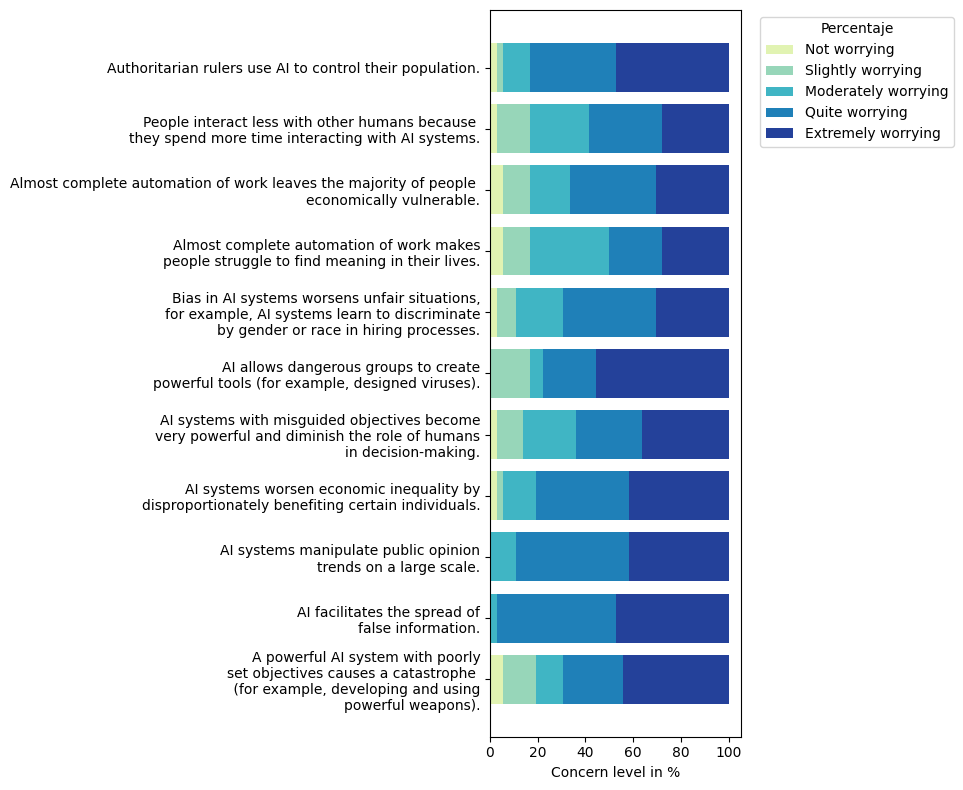

In [41]:

# We invert the DataFrame so that the categories of concern are the columns
df_t = level_percentage.T

# Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 8))

# Variables to store the bottom of the bars
bar_starts = np.zeros(len(df_t.columns))

# Define the color palette
palette = sns.color_palette('YlGnBu', len(df_t))

# We create the stacked bars
for (category, color) in zip(df_t.index, palette):
    ax.barh(df_t.columns, df_t.loc[category], left=bar_starts, color=color, label=category)
    bar_starts += df_t.loc[category].values

# We add legend, titles, and labels
ax.legend(title='Percentaje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Concern level in %')
#plt.title('Graph 1: Concern Levels for AI Scenarios Over the Next 30 Years')

# Displaying the chart
plt.tight_layout()
plt.show()



In [42]:
level_count.to_csv("Concern.csv")

Generating heatmap in percentages

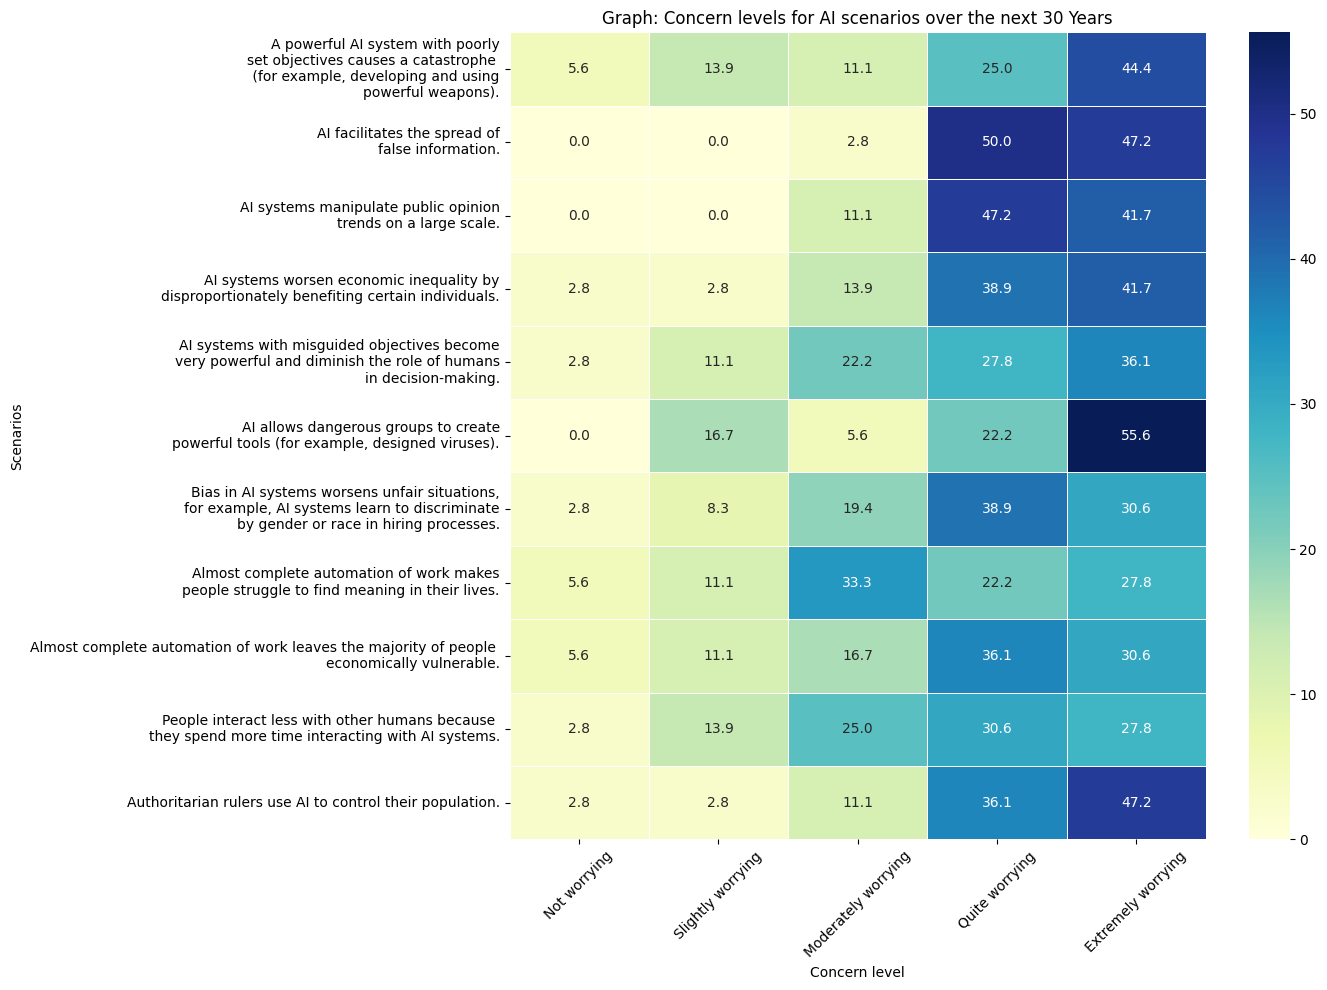

In [43]:


plt.figure(figsize=(14, 10))

# Heatmap

heatmap = sns.heatmap(level_percentage, annot=True, fmt=".1f", linewidths=.5, cmap='YlGnBu')

# Title and tags
heatmap.set_title('Graph: Concern levels for AI scenarios over the next 30 Years')
heatmap.set_xlabel('Concern level')
heatmap.set_ylabel('Scenarios')

#We improved the visibility of labels by adjusting the rotation

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# We show the figure adjusting its design so that everything fits well

plt.tight_layout()
plt.show()


Causes of AI progress

Columns to analize

In [44]:

# We define the names of the columns of interest

columns_4_1_CAIP= [

  "Research Effort",
  "Computing Power",
  "Quantity and Quality of Data",
  "Funding",
  "Progress in AI Algorithms",
]

# We define response options
AnsOpt_4_1_CAIP = [
  "Muy poco importante (< 10%)",
  "Poco importante (11 - 40%)",
  "Igual de importante (41 - 60%)",
  "Importante (61 - 90%)",
  "Muy importante (> 90%)",

]

# We count the occurrences of each level of concern in the columns of interest

progress_count= sondeo_AI[columns_4_1_CAIP].apply(lambda x: x.value_counts()).fillna(0).astype(int)
progress_count = progress_count.reindex(AnsOpt_4_1_CAIP).T

progress_count


,Muy poco importante (< 10%),Poco importante (11 - 40%),Igual de importante (41 - 60%),Importante (61 - 90%),Muy importante (> 90%)
Research Effort,NaN,0.0,9.0,7.0,20.0
Computing Power,NaN,1.0,6.0,7.0,22.0
Quantity and Quality of Data,NaN,0.0,6.0,9.0,21.0
Funding,NaN,1.0,9.0,11.0,15.0
Progress in AI Algorithms,NaN,1.0,6.0,13.0,16.0


Rename labels

In [46]:
progress_count.rename(columns={

    'Muy poco importante (< 10%)':'Not at all important',
    'Poco importante (11 - 40%)':'Slightly important',
    'Igual de importante (41 - 60%)':'Equally important',
    'Importante (61 - 90%)':'Quite important',
    'Muy importante (> 90%)':'Extremely important'}, inplace=True)


Delete NaN values

In [47]:
progress_count.dropna(axis=1, how='all', inplace=True)
progress_count = progress_count.astype(int)

In [48]:
progress_count


,Slightly important,Equally important,Quite important,Extremely important
Research Effort,0,9,7,20
Computing Power,1,6,7,22
Quantity and Quality of Data,0,6,9,21
Funding,1,9,11,15
Progress in AI Algorithms,1,6,13,16


Descriptive estatistics

In [49]:
data = np.array(progress_count)

# Compute descriptive statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 9.0
Median: 8.0
Standard Deviation: 6.81175454637056
Minimum Value: 0
Maximum Value: 22


In [50]:
progress_count.to_csv("Sondeo_ProgresoAI.csv")

In [51]:
progress_percentage =progress_count.apply(lambda x: round((x / len(sondeo_AI.index)) * 100, 1)).fillna(0)

progress_percentage

,Slightly important,Equally important,Quite important,Extremely important
Research Effort,0.0,25.0,19.4,55.6
Computing Power,2.8,16.7,19.4,61.1
Quantity and Quality of Data,0.0,16.7,25.0,58.3
Funding,2.8,25.0,30.6,41.7
Progress in AI Algorithms,2.8,16.7,36.1,44.4


Generating graph Causes of AI Progress

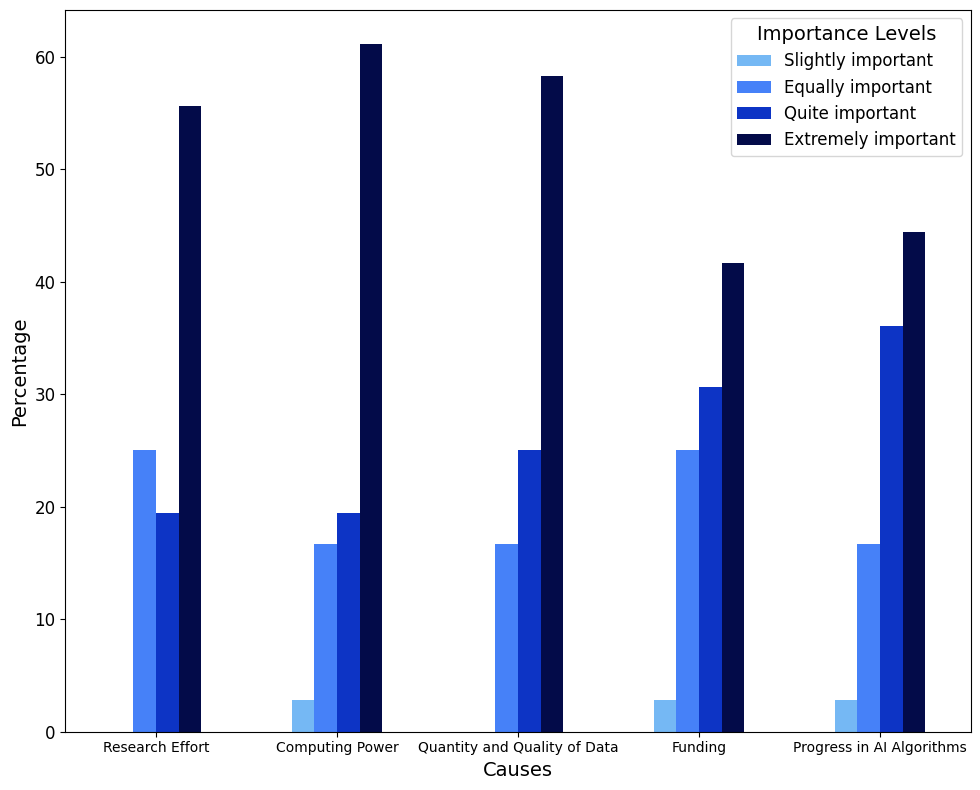

In [52]:

blue_palette = ['#75B8F4', '#4681F8', '#0D34C5', '#030B49', '#2171b5', '#08519c', '#030B49']

# Create a non-stacked bar chart with horizontal x-axis labels and blue palette

ax = progress_percentage.plot(kind='bar', stacked=False, rot=0, figsize=(10, 8), color=blue_palette)

# Set titles and labels with a larger font size
#plt.title('Causes of AI Progress', fontsize=16)
plt.xlabel('Causes', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Set the axis marks with a larger font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Set the legend to a larger font size
plt.legend(title='Importance Levels', fontsize=12, title_fontsize=14)

# Adjust the layout to make sure labels and titles don't get cut off
plt.tight_layout()

plt.show()


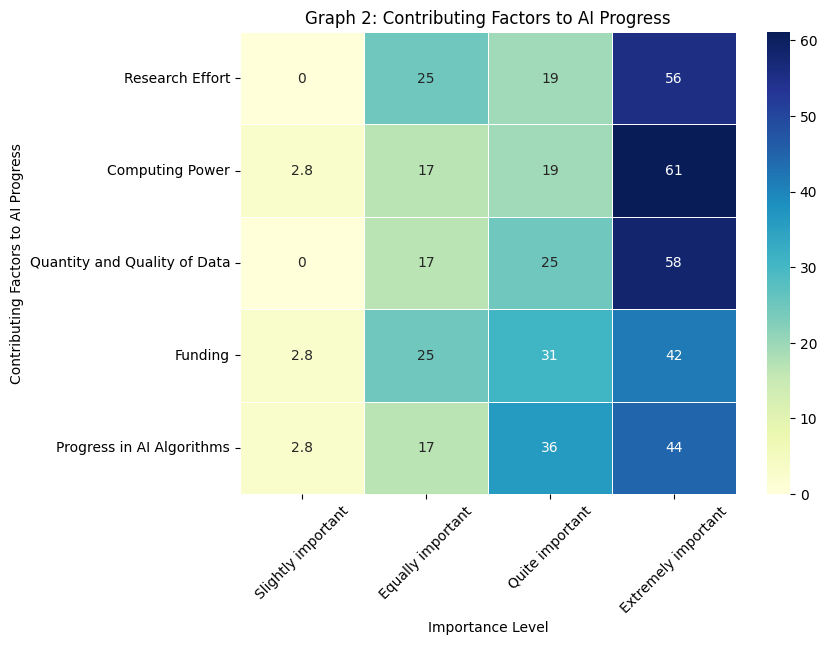

In [53]:
# Data based on the provided table
df = progress_percentage

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df, annot=True, linewidths=.5, cmap='YlGnBu')

# Title and labels
heatmap.set_title('Graph 2: Contributing Factors to AI Progress')
heatmap.set_xlabel('Importance Level')
heatmap.set_ylabel('Contributing Factors to AI Progress')


heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
# Display the heatmap
plt.show()



**AI risks in 20 years**

Columns to analize

In [54]:
# Interest columns
columns_5_1_AIR20 = [
 "Sometimes deceiving humans to achieve a goal without this being intended by humans.",
 "Explaining their actions accurately.",
 "Often behaving in ways that are surprising to humans.",
 "Making design improvements to increase their own performance regardless of human desires.",
 "Can speak as a human expert on most topics.",
 "Taking actions to gain power.",
 "Capable of executing important actions in the world similar to a human, for example, running a business.",
 "Can be 'unleashed' to follow illegal commands.",
 "Have goals not aligned with human goals.",
 "Forming collaborative relationships with other AI systems without this being intended by humans.",
 "Finding unexpected ways to achieve goals.",
]

# Define anwers option
AnsOpt_5_1_AIR20= [
"Muy poco probable (< 10%)",
"Poco probable (10 - 40%)",
"Equiprobable (41 - 60%)",
"Probable (61 - 90%)",
"Muy probable ( > 90%)"

]

# We count the occurrences of each level of concern in the columns of interest
probability_count = sondeo_AI[columns_5_1_AIR20 ].apply(lambda x: x.value_counts()).fillna(0).astype(int)
probability_count = probability_count.reindex(AnsOpt_5_1_AIR20).T

# We visualize the DataFrame of counts
probability_count


,Muy poco probable (< 10%),Poco probable (10 - 40%),Equiprobable (41 - 60%),Probable (61 - 90%),Muy probable ( > 90%)
Sometimes deceiving humans to achieve a goal without this being intended by humans.,2,9,7,11,7
Explaining their actions accurately.,3,3,9,14,7
Often behaving in ways that are surprising to humans.,0,0,9,13,14
Making design improvements to increase their own performance regardless of human desires.,1,8,9,9,9
Can speak as a human expert on most topics.,0,1,11,11,13
Taking actions to gain power.,0,14,10,9,3
"Capable of executing important actions in the world similar to a human, for example, running a business.",3,8,9,8,8
Can be 'unleashed' to follow illegal commands.,3,7,6,13,7
Have goals not aligned with human goals.,2,8,10,10,6
Forming collaborative relationships with other AI systems without this being intended by humans.,4,12,11,5,4


Rename labels

In [55]:

probability_count.rename(columns={
    'Muy poco probable (< 10%)': 'Not at all likely',
    'Poco probable (10 - 40%)': 'Slightly likely',
    'Equiprobable (41 - 60%)': 'Equally likely',
    'Probable (61 - 90%)': 'Quite likely',
    'Muy probable ( > 90%)': 'Extremely likely'}, inplace=True)
probability_count

,Not at all likely,Slightly likely,Equally likely,Quite likely,Extremely likely
Sometimes deceiving humans to achieve a goal without this being intended by humans.,2,9,7,11,7
Explaining their actions accurately.,3,3,9,14,7
Often behaving in ways that are surprising to humans.,0,0,9,13,14
Making design improvements to increase their own performance regardless of human desires.,1,8,9,9,9
Can speak as a human expert on most topics.,0,1,11,11,13
Taking actions to gain power.,0,14,10,9,3
"Capable of executing important actions in the world similar to a human, for example, running a business.",3,8,9,8,8
Can be 'unleashed' to follow illegal commands.,3,7,6,13,7
Have goals not aligned with human goals.,2,8,10,10,6
Forming collaborative relationships with other AI systems without this being intended by humans.,4,12,11,5,4


Descriptive statistics

In [56]:

data = np.array(probability_count)

# Compute descriptive statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)


Mean: 7.2
Median: 8.0
Standard Deviation: 4.209944935938755
Minimum Value: 0
Maximum Value: 16


Convert to percentaje values

In [57]:
probability_percentage =probability_count.apply(lambda x: round((x / len(sondeo_AI.index)) * 100, 1)).fillna(0)

probability_percentage

,Not at all likely,Slightly likely,Equally likely,Quite likely,Extremely likely
Sometimes deceiving humans to achieve a goal without this being intended by humans.,5.6,25.0,19.4,30.6,19.4
Explaining their actions accurately.,8.3,8.3,25.0,38.9,19.4
Often behaving in ways that are surprising to humans.,0.0,0.0,25.0,36.1,38.9
Making design improvements to increase their own performance regardless of human desires.,2.8,22.2,25.0,25.0,25.0
Can speak as a human expert on most topics.,0.0,2.8,30.6,30.6,36.1
Taking actions to gain power.,0.0,38.9,27.8,25.0,8.3
"Capable of executing important actions in the world similar to a human, for example, running a business.",8.3,22.2,25.0,22.2,22.2
Can be 'unleashed' to follow illegal commands.,8.3,19.4,16.7,36.1,19.4
Have goals not aligned with human goals.,5.6,22.2,27.8,27.8,16.7
Forming collaborative relationships with other AI systems without this being intended by humans.,11.1,33.3,30.6,13.9,11.1


In [58]:
descriptive_stats = probability_percentage.describe().round(2)

descriptive_stats

,Not at all likely,Slightly likely,Equally likely,Quite likely,Extremely likely
count,11.00,11.00,11.00,11.00,11.00
mean,5.05,18.67,25.77,26.77,23.72
std,3.88,12.11,4.51,9.41,11.48
min,0.00,0.00,16.70,8.30,8.30
25%,1.40,9.70,25.00,23.60,18.05
50%,5.60,22.20,25.00,27.80,19.40
75%,8.30,23.60,29.20,33.35,30.55
max,11.10,38.90,30.60,38.90,44.40


In [60]:

#experiment to add columns with the most representative answers
# Add the last two categories to obtain a column of the sum of significant probabilities
#probability_percentage['Sum of Quite and Extremely Likely'] = probability_percentage['Quite likely'] + probability_percentage['Extremely likely']

# DataFrame
#SumEQ=probability_percentage[['Sum of Quite and Extremely Likely']]
#SumEQ


In [64]:
# New index names provided by you
new_index_names = {
    'Sometimes deceiving humans to achieve a goal without this being intended by humans.': 'Sometimes deceiving humans \nto achieve a goal without \nthis being intended by humans.',
    'Explaining their actions accurately.': 'Explaining their actions accurately.',
    'Often behaving in ways that are surprising to humans.': 'Often behaving in ways \nthat are surprising \nto humans.',
    'Making design improvements to increase their own performance regardless of human desires.': 'Making design improvements \nto increase their own performance \nregardless of human desires.',
    'Can speak as a human expert on most topics.': 'Can speak as a human expert \non most topics.',
    'Taking actions to gain power.': 'Taking actions to gain power.',
    'Capable of executing important actions in the world similar to a human, for example, running a business.': 'Capable of executing important actions \nin the world similar to a human, \nfor example, running a business.',
    'Can be \'unleashed\' to follow illegal commands.': 'Can be unleashed \nto follow illegal commands.',
    'Have goals not aligned with human goals.': 'Have goals not aligned \nwith human goals.',
    'Forming collaborative relationships with other AI systems without this being intended by humans.': 'Forming collaborative relationships \nwith other AI systems without \nthis being intended by humans.',
    'Finding unexpected ways to achieve goals.': 'Finding unexpected \nways to achieve goals.',
}

# Assuming 'level_percentage' is your DataFrame, you would rename the indices like this:
probability_percentage = probability_percentage.rename(index=new_index_names)

In [65]:
data = np.array(probability_percentage)

# Compute descriptive statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)


Mean: 19.99818181818182
Median: 22.2
Standard Deviation: 11.695803301869995
Minimum Value: 0.0
Maximum Value: 44.4


Generating Graph 3: AI risk perspectives in 20 years in percentages

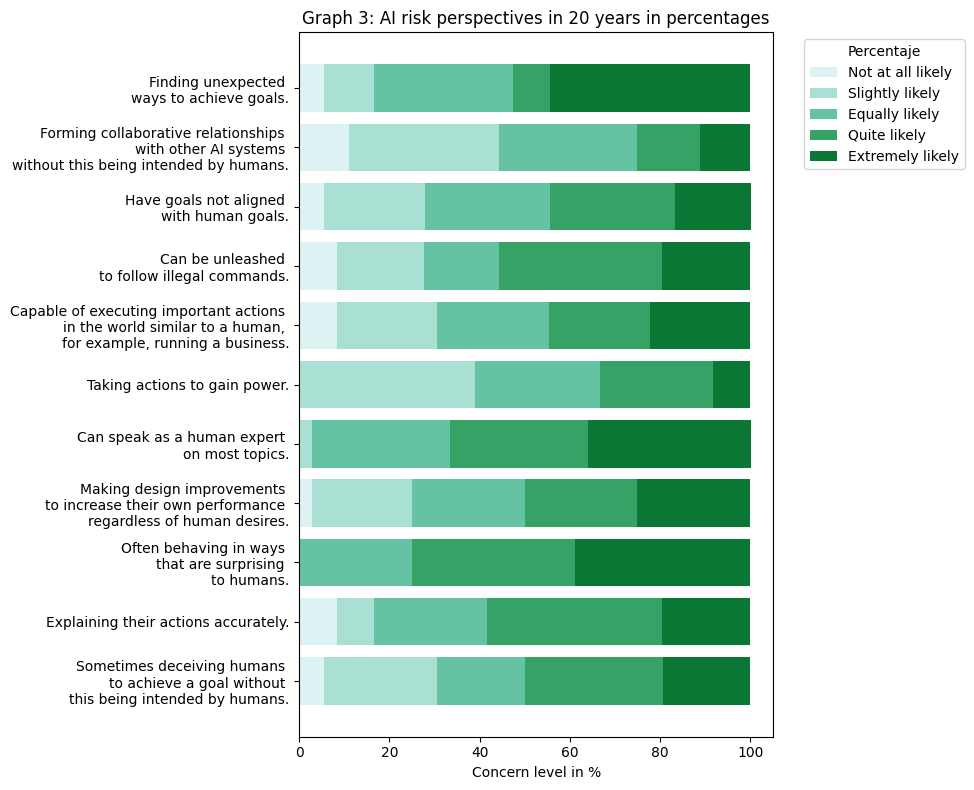

In [106]:

# We invert the DataFrame so that the categories of concern are the columns
df_t = probability_percentage.T

# Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 8))

# Variables to store the bottom of the bars
bar_starts = np.zeros(len(df_t.columns))

# Define the color palette
palette = sns.color_palette('BuGn', len(df_t))

# We create the stacked bars
for (category, color) in zip(df_t.index, palette):
    ax.barh(df_t.columns, df_t.loc[category], left=bar_starts, color=color, label=category)
    bar_starts += df_t.loc[category].values

# We add legend, titles, and labels
ax.legend(title='Percentaje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Concern level in %')
plt.title('Graph 3: AI risk perspectives in 20 years in percentages')

# Displaying the chart
plt.tight_layout()
plt.show()



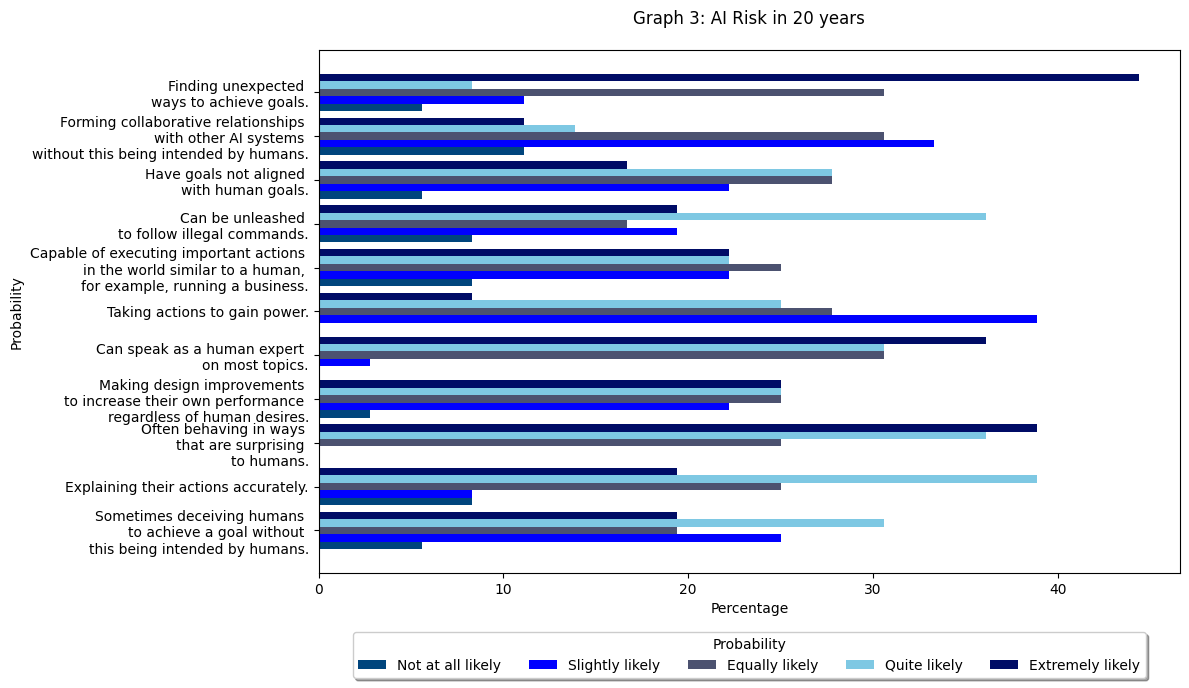

In [107]:
# Crear una figura y un conjunto de subgráficos
fig, ax = plt.subplots(figsize=(12,7))

# Ancho de las barras
bar_width = 0.17

# Posiciones de las barras para cada categoría
r1 = range(len(probability_percentage))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Dibujando las barras
ax.barh(r1, probability_percentage['Not at all likely'], height=bar_width, label='Not at all likely', color='#00457D')
ax.barh(r2, probability_percentage['Slightly likely'], height=bar_width, label='Slightly likely', color='#0000FF')
ax.barh(r3, probability_percentage['Equally likely'], height=bar_width, label='Equally likely', color='#4C5270')
ax.barh(r4, probability_percentage['Quite likely'], height=bar_width, label='Quite likely', color='#7EC8E3')
ax.barh(r5, probability_percentage['Extremely likely'], height=bar_width, label='Extremely likely', color='#000C66')

# Añadiendo las etiquetas de las afirmaciones a la izquierda de las barras
ax.set_yticks([x + bar_width*2 for x in r1])
ax.set_yticklabels(probability_percentage.index)

# Ajustando la visualización y añadiendo títulos y etiquetas

ax.set_title('Graph 3: AI Risk in 20 years', pad=19)
ax.set_xlabel('Percentage')
ax.set_ylabel('Probability')

# Colocando la leyenda más abajo para evitar que cubra el título del eje X
ax.legend(title='Probability', loc='upper center', bbox_to_anchor=(0.5, -0.10), shadow=True, ncol=5)

# Ajustar el layout para asegurar que no haya sobreposición de elementos
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [109]:

probability_count.rename(columns={
    'Muy poco probable (< 10%)': 'Not at all likely',
    'Poco probable (10 - 40%)': 'Slightly likely',
    'Equiprobable (41 - 60%)': 'Equally likely',
    'Probable (61 - 90%)': 'Quite likely',
    'Muy probable ( > 90%)': 'Extremely likely'}, inplace=True)
probability_count

,Not at all likely,Slightly likely,Equally likely,Quite likely,Extremely likely
Sometimes deceiving humans to achieve a goal without this being intended by humans.,2,9,7,11,7
Explaining their actions accurately.,3,3,9,14,7
Often behaving in ways that are surprising to humans.,0,0,9,13,14
Making design improvements to increase their own performance regardless of human desires.,1,8,9,9,9
Can speak as a human expert on most topics.,0,1,11,11,13
Taking actions to gain power.,0,14,10,9,3
"Capable of executing important actions in the world similar to a human, for example, running a business.",3,8,9,8,8
Can be 'unleashed' to follow illegal commands.,3,7,6,13,7
Have goals not aligned with human goals.,2,8,10,10,6
Forming collaborative relationships with other AI systems without this being intended by humans.,4,12,11,5,4


In [110]:

probability_count.rename(columns={
    'Muy poco probable (< 10%)': 'Not at all likely',
    'Poco probable (10 - 40%)': 'Slightly likely',
    'Equiprobable (41 - 60%)': 'Equally likely',
    'Probable (61 - 90%)': 'Quite likely',
    'Muy probable ( > 90%)': 'Extremely likely'}, inplace=True)
probability_count

,Not at all likely,Slightly likely,Equally likely,Quite likely,Extremely likely
Sometimes deceiving humans to achieve a goal without this being intended by humans.,2,9,7,11,7
Explaining their actions accurately.,3,3,9,14,7
Often behaving in ways that are surprising to humans.,0,0,9,13,14
Making design improvements to increase their own performance regardless of human desires.,1,8,9,9,9
Can speak as a human expert on most topics.,0,1,11,11,13
Taking actions to gain power.,0,14,10,9,3
"Capable of executing important actions in the world similar to a human, for example, running a business.",3,8,9,8,8
Can be 'unleashed' to follow illegal commands.,3,7,6,13,7
Have goals not aligned with human goals.,2,8,10,10,6
Forming collaborative relationships with other AI systems without this being intended by humans.,4,12,11,5,4


In [111]:
probability_count.to_csv("Sondeo_ProgresoAI.csv")

Perception of AI safety in Mexico

Columns to analize

In [132]:
# Interest columns
columns_8GM_AISafety = [
  "I am concerned about the impact of AI on the labor market in Mexico.",
  "Biases in AI algorithms represent a risk to equity and justice in Mexico.",
  "Current regulations in Mexico are adequate for AI security challenges.",
  "It is important for the government to invest in mitigating AI security risks.",
  "I would agree with the creation of a special agency for AI security in Mexico.",
  "The government should regulate and supervise the use and development of AI more in Mexico.",
  "AI experts should take into account the needs and concerns of society.",
  "Socioeconomic inequality in Mexico could increase due to the way AI is currently being developed and utilized in the country.",
]

# Define anwers option
AnsOpt_8GM_AISafety= [
"Totalmente en desacuerdo",
"En desacuerdo",
"Neutral",
"De acuerdo",
"Totalmente de acuerdo"

]

# We count the occurrences of each level of concern in the columns of interest
perception_count = sondeo_AI[columns_8GM_AISafety].apply(lambda x: x.value_counts()).fillna(0).astype(int)
perception_count = perception_count.reindex(AnsOpt_8GM_AISafety).T

# We visualize the DataFrame of counts
perception_count


,Totalmente en desacuerdo,En desacuerdo,Neutral,De acuerdo,Totalmente de acuerdo
I am concerned about the impact of AI on the labor market in Mexico.,0,3,9,12,12
Biases in AI algorithms represent a risk to equity and justice in Mexico.,0,4,10,12,10
Current regulations in Mexico are adequate for AI security challenges.,13,14,5,1,3
It is important for the government to invest in mitigating AI security risks.,1,1,4,11,19
I would agree with the creation of a special agency for AI security in Mexico.,0,2,5,10,19
The government should regulate and supervise the use and development of AI more in Mexico.,1,3,5,11,16
AI experts should take into account the needs and concerns of society.,0,0,1,12,23
Socioeconomic inequality in Mexico could increase due to the way AI is currently being developed and utilized in the country.,0,3,11,12,10


Descriptive statistics

In [133]:

data = np.array(perception_count)

# Compute descriptive statistics
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)


Mean: 7.2
Median: 5.0
Standard Deviation: 6.153048025166064
Minimum Value: 0
Maximum Value: 23


Rename labels

In [134]:

perception_count.rename(columns={
    'Totalmente en desacuerdo': 'Strongly disagree',
    'En desacuerdo': 'Disagree',
    'Neutral': 'Neutral',
    'De acuerdo': 'Agree',
    'Totalmente de acuerdo': 'Strongly agree'
}, inplace=True)

perception_count



,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
I am concerned about the impact of AI on the labor market in Mexico.,0,3,9,12,12
Biases in AI algorithms represent a risk to equity and justice in Mexico.,0,4,10,12,10
Current regulations in Mexico are adequate for AI security challenges.,13,14,5,1,3
It is important for the government to invest in mitigating AI security risks.,1,1,4,11,19
I would agree with the creation of a special agency for AI security in Mexico.,0,2,5,10,19
The government should regulate and supervise the use and development of AI more in Mexico.,1,3,5,11,16
AI experts should take into account the needs and concerns of society.,0,0,1,12,23
Socioeconomic inequality in Mexico could increase due to the way AI is currently being developed and utilized in the country.,0,3,11,12,10


Convert to percentaje values

In [135]:
perception_percentage =perception_count.apply(lambda x: round((x / len(sondeo_AI.index)) * 100, 1)).fillna(0)

perception_percentage

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
I am concerned about the impact of AI on the labor market in Mexico.,0.0,8.3,25.0,33.3,33.3
Biases in AI algorithms represent a risk to equity and justice in Mexico.,0.0,11.1,27.8,33.3,27.8
Current regulations in Mexico are adequate for AI security challenges.,36.1,38.9,13.9,2.8,8.3
It is important for the government to invest in mitigating AI security risks.,2.8,2.8,11.1,30.6,52.8
I would agree with the creation of a special agency for AI security in Mexico.,0.0,5.6,13.9,27.8,52.8
The government should regulate and supervise the use and development of AI more in Mexico.,2.8,8.3,13.9,30.6,44.4
AI experts should take into account the needs and concerns of society.,0.0,0.0,2.8,33.3,63.9
Socioeconomic inequality in Mexico could increase due to the way AI is currently being developed and utilized in the country.,0.0,8.3,30.6,33.3,27.8


In [136]:
perception_percentage.to_csv("perception_percentage.csv")

Generating graph

In [137]:
new_index_names2 = {
    "I am concerned about the impact of AI on the labor market in Mexico.": "I am concerned about the impact of AI on\nthe labor market in Mexico.",
    "Biases in AI algorithms represent a risk to equity and justice in Mexico.": "Biases in AI algorithms represent a risk\nto equity and justice in Mexico.",
    "Current regulations in Mexico are adequate for AI security challenges.": "Current regulations in Mexico are\nadequate for AI security challenges.",
    "It is important for the government to invest in mitigating AI security risks.": "It is important for the government to invest\nin mitigating AI security risks.",
    "I would agree with the creation of a special agency for AI security in Mexico.": "I would agree with the creation of a special\nagency for AI security in Mexico.",
    "The government should regulate and supervise the use and development of AI more in Mexico.": "The government should regulate and supervise\nthe use and development of AI more in Mexico.",
    "AI experts should take into account the needs and concerns of society.": "AI experts should take into account the\nneeds and concerns of society.",
    "Socioeconomic inequality in Mexico could increase due to the way AI is currently being developed and utilized in the country.": "Socioeconomic inequality in Mexico could\nincrease due to the way AI is currently being\ndeveloped and utilized in the country.",
}
perception_percentage=perception_percentage.rename(index=new_index_names2)

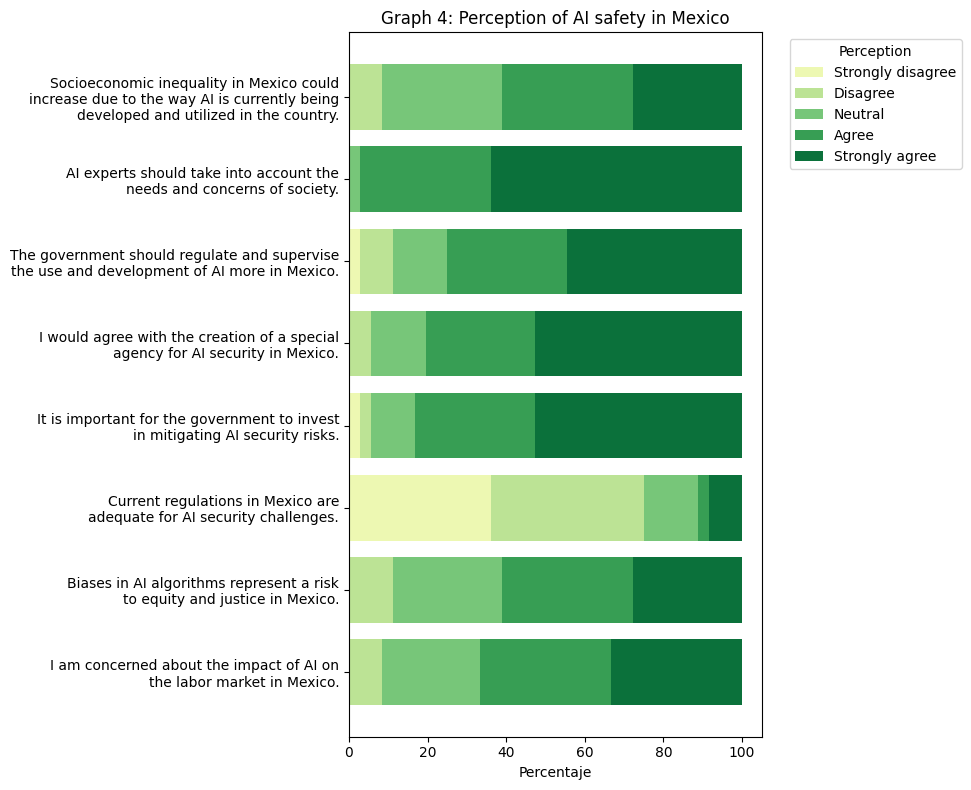

In [138]:
# We invert the DataFrame so that the categories of concern are the columns
df_t = perception_percentage.T

# Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 8))

# Variables to store the bottom of the bars
bar_starts = np.zeros(len(df_t.columns))

# Define the color palette
palette = sns.color_palette('YlGn', len(df_t))

# We create the stacked bars
for (category, color) in zip(df_t.index, palette):
    ax.barh(df_t.columns, df_t.loc[category], left=bar_starts, color=color, label=category)
    bar_starts += df_t.loc[category].values

# We add legend, titles, and labels
ax.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Percentaje')
plt.title('Graph 4: Perception of AI safety in Mexico')


# Displaying the chart
plt.tight_layout()
plt.show()

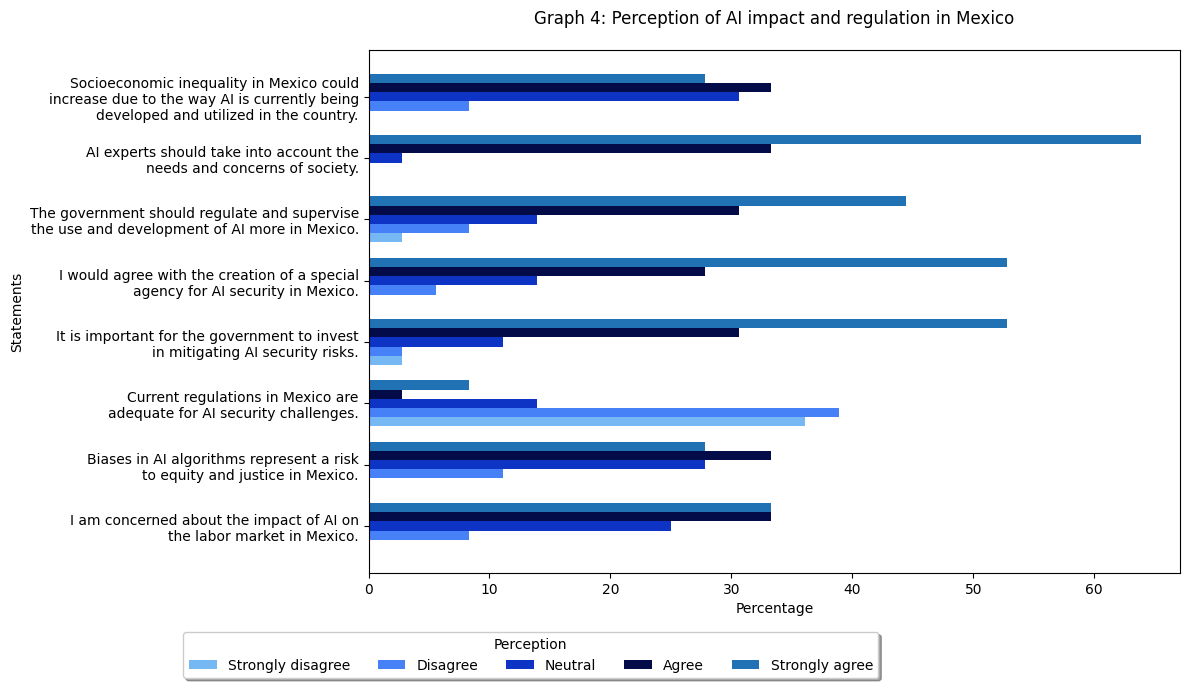

In [139]:
# Create a figure and a set of subgraphs
fig, ax = plt.subplots(figsize=(12, 7))

# Width of bars
bar_width = 0.15

# Bar positions for each category
r1 = range(len(perception_percentage))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Drawing the bars
ax.barh(r1, perception_percentage['Strongly disagree'], height=bar_width, label='Strongly disagree', color='#75B8F4')
ax.barh(r2, perception_percentage['Disagree'], height=bar_width, label='Disagree', color='#4681F8')
ax.barh(r3, perception_percentage['Neutral'], height=bar_width, label='Neutral', color='#0D34C5')
ax.barh(r4, perception_percentage['Agree'], height=bar_width, label='Agree', color='#030B49')
ax.barh(r5, perception_percentage['Strongly agree'], height=bar_width, label='Strongly agree', color='#2171b5')

# Adding affirmation labels to the left of the bars
ax.set_yticks([x + bar_width*2 for x in r1])
ax.set_yticklabels(perception_percentage.index)

# Adjusting the display and adding titles and labels
ax.set_title('Graph 4: Perception of AI impact and regulation in Mexico', pad=19)
ax.set_xlabel('Percentage')
ax.set_ylabel('Statements')

# Placing the legend lower to prevent it from covering the X axis title
ax.legend(title='Perception', loc='upper center', bbox_to_anchor=(0.2, -0.10), shadow=True, ncol=5)

# Adjust the layout to ensure there is no overlapping of elements
plt.tight_layout()

plt.show()
